In [17]:
# 1. Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import os
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [18]:
dataSetPath = r"..\1_DataSets\iris.csv"

dataset = pd.read_csv(dataSetPath)
dataSetName = os.path.basename(dataSetPath)


 
print(f"{dataSetName} Columns: {dataset.columns.to_list()}")
print("****************************")
print(f"{dataSetName} Shape: {dataset.shape}")
print("****************************")

totalNumberOfRowInActualDataset = len(dataset)
print(f"Total Rows in dataset File: {totalNumberOfRowInActualDataset}")

iris.csv Columns: ['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety']
****************************
iris.csv Shape: (150, 5)
****************************
Total Rows in dataset File: 150


In [19]:
dataset.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [21]:
dataset.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Pre-Processing (Removing Nan and  Duplicates)

In [22]:
dataset.drop_duplicates(inplace=True)
print(f"Dataset Shape after removing duplcates: {dataset.shape}")
print("****************************")

numberOfRowAfterRemovingDuplicates = len(dataset)
print(f"Remaining Rows in Dataset: {numberOfRowAfterRemovingDuplicates}")

print("****************************")
print(f"Total Duplicates: {(totalNumberOfRowInActualDataset - numberOfRowAfterRemovingDuplicates)}")

# Step 2: Handle missing values (remove rows with missing values)
cleanedDataset = dataset.dropna()
numberOfRowAfterRemovingNullValues = len(cleanedDataset)
print(f"Remaining Rows in Dataset: {numberOfRowAfterRemovingNullValues}")

print("****************************")
print(f"Removed Number of rows containing Null Values: {( numberOfRowAfterRemovingDuplicates - numberOfRowAfterRemovingNullValues)}")


Dataset Shape after removing duplcates: (149, 5)
****************************
Remaining Rows in Dataset: 149
****************************
Total Duplicates: 1
Remaining Rows in Dataset: 149
****************************
Removed Number of rows containing Null Values: 0


# Class Distribution check (imbalanced or balanced)

Target Class Distribution:
variety
Setosa        50
Versicolor    50
Virginica     49
Name: count, dtype: int64


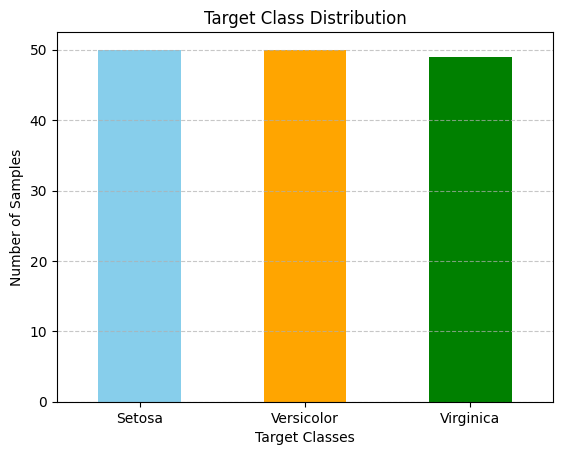

In [23]:
# Target Classes Distribution 
target_column = cleanedDataset.columns.to_list()[-1]

# Check the distribution of each target class
class_distribution = cleanedDataset[target_column].value_counts()

# Print the class distribution
print("Target Class Distribution:")
print(class_distribution)
  
# Bar plot of class distribution
class_distribution.plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title("Target Class Distribution")
plt.xlabel("Target Classes")
plt.ylabel("Number of Samples")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Target Class Distribution:
variety
Setosa        50
Versicolor    50
Virginica     49
Name: count, dtype: int64


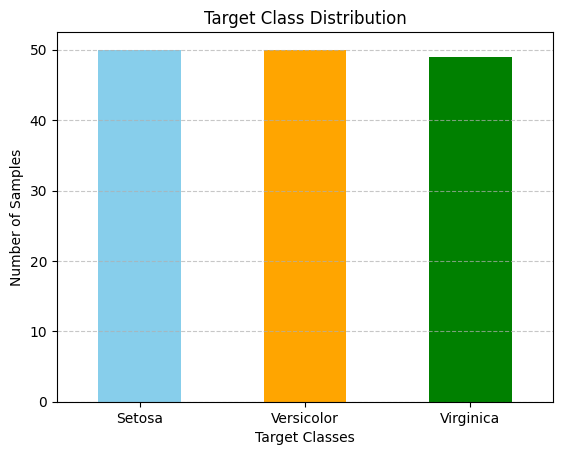

In [24]:
# Target Classes Distribution 
target_column = cleanedDataset.columns.to_list()[-1]

# Check the distribution of each target class
class_distribution = cleanedDataset[target_column].value_counts()

# Print the class distribution
print("Target Class Distribution:")
print(class_distribution)
  
# Bar plot of class distribution
class_distribution.plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title("Target Class Distribution")
plt.xlabel("Target Classes")
plt.ylabel("Number of Samples")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Label Encoding (Changing Categorical to Numerical)

In [25]:
labelEncodingAlgorithmFromScienceKit = LabelEncoder()

for col in cleanedDataset.select_dtypes(include=['object', 'category', 'bool', 'datetime']).columns:
    cleanedDataset[col] = cleanedDataset[col].str.lower()
    cleanedDataset[col] = cleanedDataset[col].str.strip()
    cleanedDataset[col] = labelEncodingAlgorithmFromScienceKit.fit_transform(cleanedDataset[col])
 

cleanedDataset.shape

cleanedDataset.head()


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Correlation Matrix (Pearson, Spearman-Rank)

In [26]:
# Calculate Pearson correlation
pearson_corr = cleanedDataset.corr(method='pearson')

# Calculate Spearman correlation
spearman_corr = cleanedDataset.corr(method='spearman')

print("Pearson Correlation:\n", pearson_corr)
print("Spearman Correlation:\n", spearman_corr)


Pearson Correlation:
               sepal.length  sepal.width  petal.length  petal.width   variety
sepal.length      1.000000    -0.118129      0.873738     0.820620  0.786971
sepal.width      -0.118129     1.000000     -0.426028    -0.362894 -0.422987
petal.length      0.873738    -0.426028      1.000000     0.962772  0.949402
petal.width       0.820620    -0.362894      0.962772     1.000000  0.956514
variety           0.786971    -0.422987      0.949402     0.956514  1.000000
Spearman Correlation:
               sepal.length  sepal.width  petal.length  petal.width   variety
sepal.length      1.000000    -0.168102      0.883607     0.836912  0.801629
sepal.width      -0.168102     1.000000     -0.309223    -0.287484 -0.437949
petal.length      0.883607    -0.309223      1.000000     0.937654  0.935422
petal.width       0.836912    -0.287484      0.937654     1.000000  0.938155
variety           0.801629    -0.437949      0.935422     0.938155  1.000000


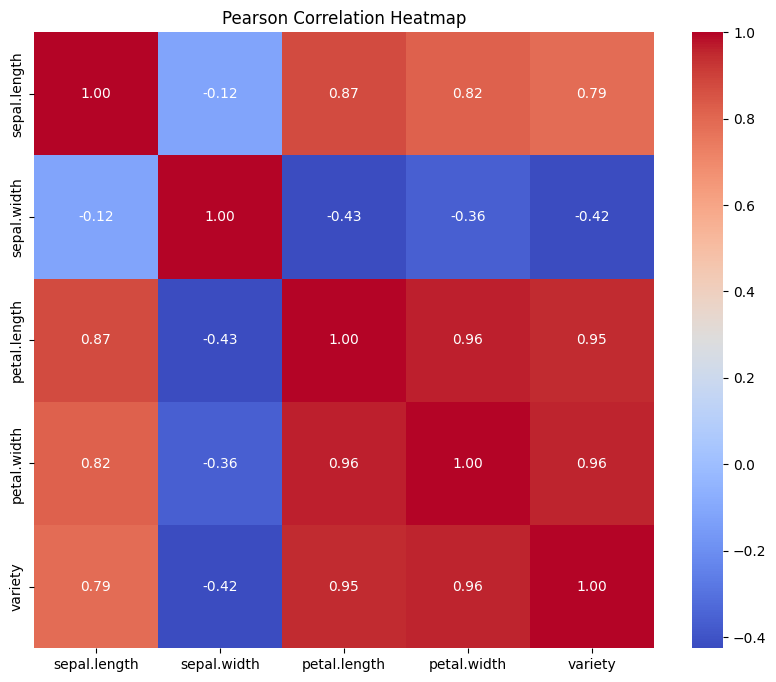

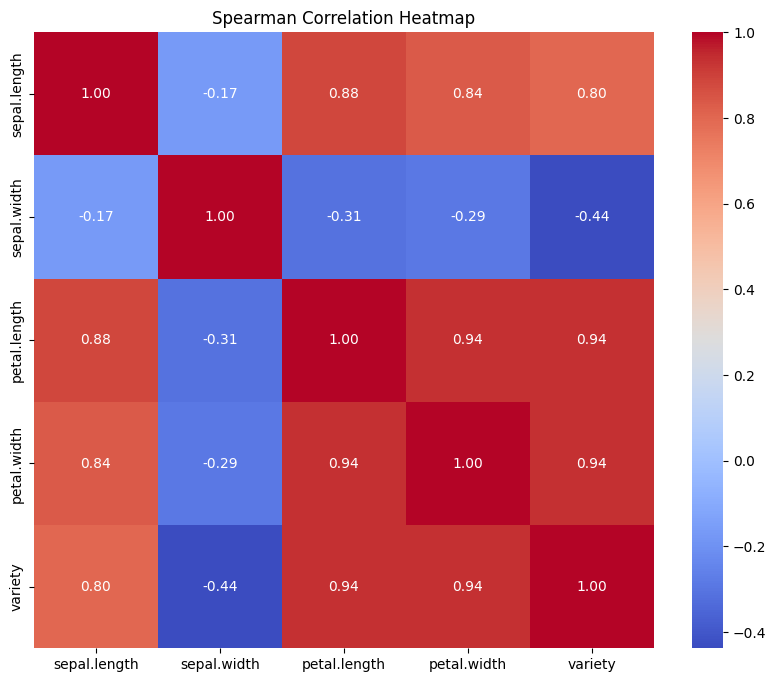

In [27]:

# Plot Pearson correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

# Plot Spearman correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Spearman Correlation Heatmap")
plt.show()

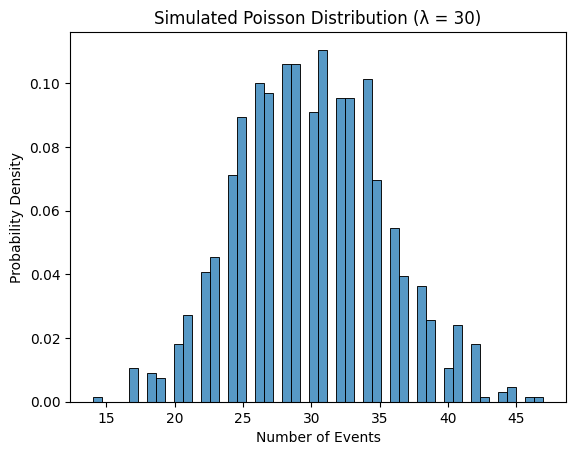

In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Step 1: Define the mean (λ) for the Poisson distribution
lambda_value = 30  # Example: average rate is 5 events per interval
# Step 2: Generate Poisson-distributed data
poisson_data = np.random.poisson(lam=lambda_value, size=1000)
# Step 3: Plot the distribution
sns.histplot(poisson_data, bins=50, kde=False, stat="density")
plt.title('Simulated Poisson Distribution (λ = {})'.format(lambda_value))
plt.xlabel('Number of Events')
plt.ylabel('Probability Density')
plt.show()


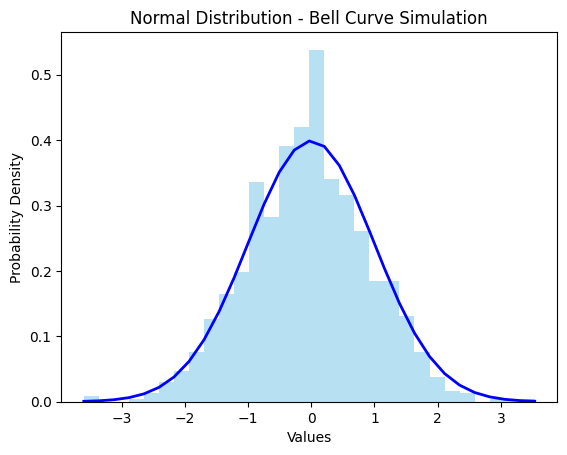

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the normal distribution
mean = 0      # Mean of the distribution
std_dev = 1   # Standard deviation of the distribution
# Generate 1000 values that follow a normal distribution
data = np.random.normal(mean, std_dev, 1000)
# Plot the histogram of the data with density=True for a probability density plot
count, bins, ignored = plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue')
# Plot the bell-shaped curve using the normal distribution's PDF
bell_curve = (1/(std_dev * np.sqrt(2 * np.pi))) * np.exp(- (bins - mean)**2 / (2 * std_dev**2))
plt.plot(bins, bell_curve, linewidth=2, color='blue')
# Adding titles and labels
plt.title('Normal Distribution - Bell Curve Simulation')
plt.xlabel('Values')
plt.ylabel('Probability Density')

# Display the plot
plt.show()


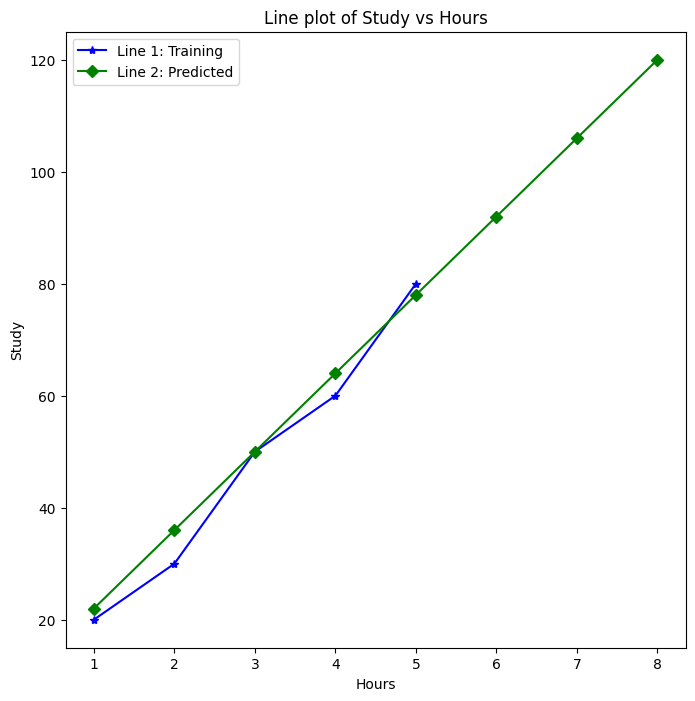

In [30]:
import numpy as np
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5, 6, 7, 8] 
y1 = [20, 30, 50, 60, 80]
y2 = [22, 36, 50, 64, 78, 92, 106, 120]


plt.figure(figsize=(8, 8))

plt.plot(x[:5], y1, color='blue', marker='*', label='Line 1: Training')
plt.plot(x, y2, color='green', marker='D', label='Line 2: Predicted')

plt.title('Line plot of Study vs Hours')
plt.xlabel('Hours')
plt.ylabel('Study')
plt.legend()

# Display the plot
plt.show()
